In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1091)>


## Загрузка и первичный анализ данных из datanorepeat.csv

In [15]:
data = pd.read_csv('data_uniq.csv')
data.shape

(1627, 10)

In [16]:
data.dtypes

name            object
author          object
section         object
publish         object
age             object
year           float64
pages          float64
rating          object
cove            object
description     object
dtype: object

In [17]:
data.isnull().sum()

name              1
author         1215
section           0
publish         316
age             545
year             21
pages           120
rating            0
cove              0
description       3
dtype: int64

### Удалим книги без названий и описания

In [18]:
clean_data = data
clean_data = clean_data.dropna(subset=['description', 'name'])
clean_data.isnull().sum()

name              0
author         1214
section           0
publish         314
age             545
year             19
pages           118
rating            0
cove              0
description       0
dtype: int64

In [19]:
clean_data.shape

(1623, 10)

In [20]:
clean_data['section'].unique()


array(['Саморазвитие и личностный рост', 'Популярная психология',
       'Копирайтинг', 'Популярная медицина', 'Психология личности',
       'Кино', 'Классическая психология', 'Лидерство',
       'Предпринимательство', 'Языкознание', 'Психология бизнеса',
       'Русский язык'], dtype=object)

#### Удалим неподходящие категории произведений

In [21]:
data_new = clean_data.query("section not in ['Копирайтинг', 'Популярная медицина', 'Кино', 'Языкознание', 'Русский язык']")

In [22]:
data_new['section'].unique()

array(['Саморазвитие и личностный рост', 'Популярная психология',
       'Психология личности', 'Классическая психология', 'Лидерство',
       'Предпринимательство', 'Психология бизнеса'], dtype=object)

In [24]:
clean_data = data_new
clean_data

,name,author,section,publish,age,year,pages,rating,cove,description
0,"Брать, давать и наслаждаться. Как оставаться в...",Татьяна Мужицкая,Саморазвитие и личностный рост,NaN,16+,2022.0,256.0,5,https://ndc.book24.ru/resize/410x590/iblock/3d...,Чувствовать себя полным сил. Вставать каждое у...
1,Роман с самим собой. Как уравновесить внутренн...,Татьяна Мужицкая,Саморазвитие и личностный рост,NaN,16+,2022.0,304.0,5,https:https://cdn.book24.ru/v2/ITD000000001044...,"Когда ты себя любишь, ты точно знаешь, чего хо..."
2,Думай медленно... решай быстро,Даниэль Канеман,Популярная психология,АСТ,16+,2022.0,656.0,"4,6",https://ndc.book24.ru/resize/410x590/iblock/0a...,Эта книга полностью изменит вашу жизнь: ведь р...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,Джен Синсеро,Саморазвитие и личностный рост,NaN,16+,2022.0,320.0,"4,2",https://ndc.book24.ru/resize/410x590/iblock/54...,Книга полна грубоватых и прикольных советов по...
4,"Психотрюки. 69 приемов в общении, которым не у...",Игорь Рызов,Саморазвитие и личностный рост,NaN,12+,2022.0,256.0,5,https://ndc.book24.ru/resize/410x590/iblock/74...,"Психотрюки — это простые приемы, которые помог..."
...,...,...,...,...,...,...,...,...,...,...
1622,Счастливая жизнь без панических атак и страхов,NaN,Саморазвитие и личностный рост,Издательские решения,16+,2016.0,120.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/28...,"Хронический стресс, тревога, приступы паники, ..."
1623,Думай и богатей в годы безденежья,NaN,Саморазвитие и личностный рост,NaN,16+,2018.0,192.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/fe...,"Годы экономического спада в стране ""подкосили""..."
1624,"Близко к сердцу. Как жить, если вы слишком чув...",Санд И.,Саморазвитие и личностный рост,Альпина,NaN,2016.0,158.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/fe...,"Высокочувствительные люди, или «новые интровер..."
1625,"Занимательная кинесика, или Тайны жестов, поз,...",NaN,Саморазвитие и личностный рост,Прометей,NaN,2022.0,480.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/4c...,"Кинесика — это молчаливый язык, язык тела, с п..."


### Сохраним очищенные данные в clean_data.csv

In [25]:
clean_data.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma — копия 3/data_preparation/clean_data.csv', index=False)

### Далее работаем с clean_data.csv

In [26]:
data = pd.read_csv('clean_data.csv')
data.shape

(1618, 10)

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

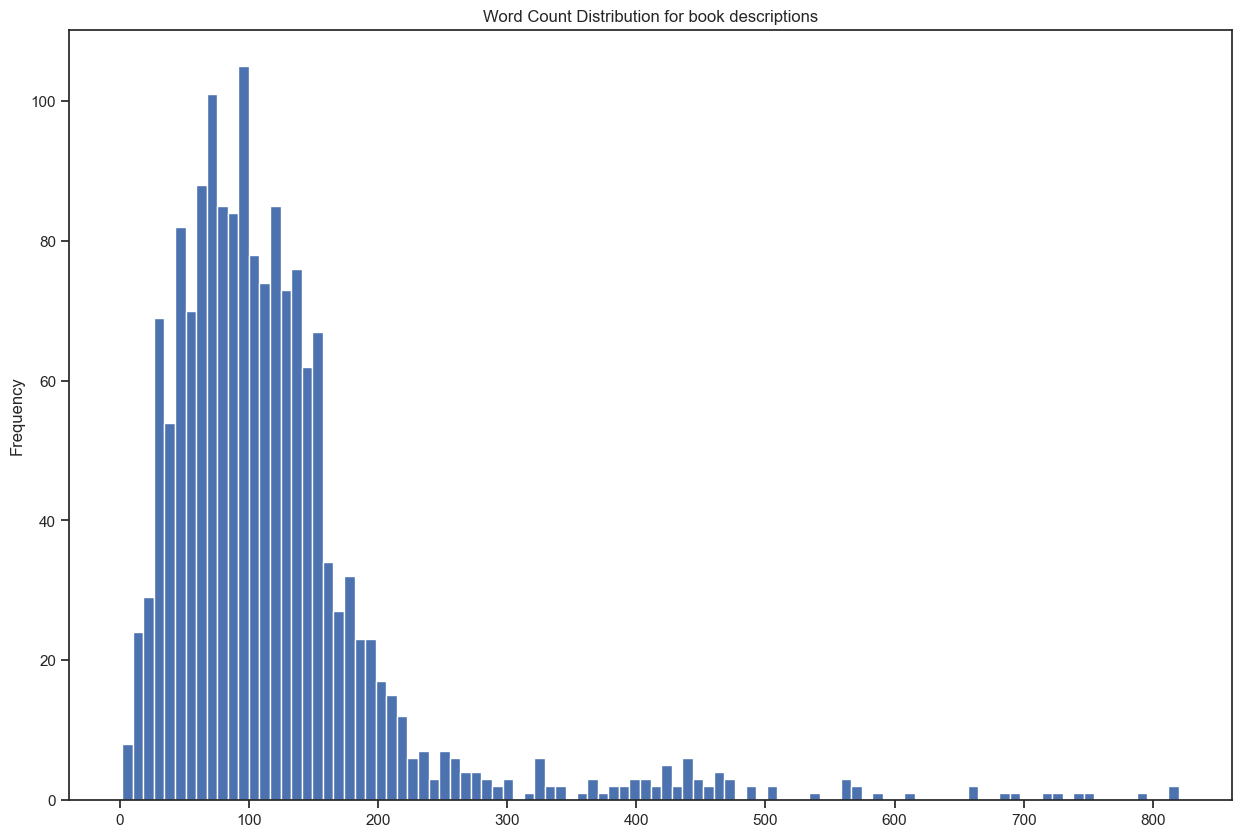

In [27]:
# анализ размера описаний
data['word_count'] = data['description'].apply(lambda x: len(str(x).split()))
data['word_count'].plot(
    kind='hist',
    bins = 100,
    figsize = (15,10),title='Word Count Distribution for book descriptions')

## description

#### убираем заглавные буквы, переносы строки, знаки препинания

In [28]:
description_new = []
for i in data.index:
    description_new.append(str(data.description[i]))
for i in range(len(description_new)):
    description_new[i] = re.sub("[^А-Яа-я, ё, \n, -]", "", description_new[i])
    description_new[i] = description_new[i].lower()
    description_new[i] = re.sub(",", " ", description_new[i])
    description_new[i] = re.sub("\n", " ", description_new[i])
    description_new[i] = re.sub("-", " ", description_new[i])

description в исходной базе

In [29]:
data.description[100]

'Валерий Синельников — известный практикующий психотерапевт, психолог, гомеопат, автор уникальных по простоте и эффективности целительных психологических методик, которые помогли тысячам людей вернуть здоровье, повысить благосостояние, познать радость жизни. Из его книги вы узнаете, как научиться использовать силы своего подсознания для того, чтобы простить и избавиться от чувства вины, справиться с депрессией и изгнать ревность, излечиться от множества заболеваний и стать удачливым. Книга обладает целительной силой, и позитивное воздействие начинается с того момента, как только вы возьмете ее в руки.\n\nКоличество страниц может отличаться от заявленного и зависит от объёма рекламного материала'

description после преобразований

In [30]:
description_new[100]

'валерий синельников  известный практикующий психотерапевт  психолог  гомеопат  автор уникальных по простоте и эффективности целительных психологических методик  которые помогли тысячам людей вернуть здоровье  повысить благосостояние  познать радость жизни из его книги вы узнаете  как научиться использовать силы своего подсознания для того  чтобы простить и избавиться от чувства вины  справиться с депрессией и изгнать ревность  излечиться от множества заболеваний и стать удачливым книга обладает целительной силой  и позитивное воздействие начинается с того момента  как только вы возьмете ее в руки  количество страниц может отличаться от заявленного и зависит от объёма рекламного материала'

#### Работаем со стоп словами - слова, которые не несут большой информативной нагрузки

стоп-слова: и, в, во, не, что, он, на, я, с, со, как, а, то, все, чтоб, без, будто, впрочем, хорошо, свою, этой, перед, иногда, лучше, чуть, том, нельзя, такой, им, более, всегда, конечно, всю, между и тд. Всего 151

In [31]:
stop_words = stopwords.words('russian')

In [32]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [33]:
# функция, которая удаляет стоп-слова и возвращает текст без них
def stopwords(text):
    y = []
    for i in text.split():
        if not i in stop_words:
            y.append(i)
    return " ".join(y)

In [34]:
stopwords('мне конечно понравилась эта книга')

'понравилась эта книга'

In [35]:
data['tags'] = data.apply(lambda _: '', axis=1)
# из списка description_new сделали датафрейм
description_new = pd.DataFrame(description_new)
description_new.head()

,0
0,чувствовать себя полным силвставать каждое утр...
1,когда ты себя любишь ты точно знаешь чего хо...
2,эта книга полностью изменит вашу жизнь ведь ре...
3,книга полна грубоватых и прикольных советов по...
4,психотрюки это простые приемы которые помога...


#### В description_without_stopwords = [] добавляем описания без стоп-слов

In [37]:
%%time
description_without_stopwords = []
for i in range(len(description_new[0])):
    description_without_stopwords.append(stopwords(description_new[0][i]))

CPU times: user 720 ms, sys: 20.4 ms, total: 740 ms
Wall time: 751 ms


In [38]:
description_without_stopwords[0]

'чувствовать полным силвставать каждое утро той ноги испытывать воодушевление приступая сложной задаче вроде ремонта квартиры поиска работы новая книга татьяны мужицкой это уникальная система практик которая поможет оставаться ресурсе эпидемии рвануть недельку тай посидеть ресторане друзьями татьяна объясняет черпать жизненные силы зависит внешних обстоятельств подход основан одноименном марафоне течение полугода прошли человек отзывы говорят сами брать давать наслаждаться это целая система отношений собой миром превращающая настоящий генератор вдохновения бодрости собой любить наслаждаться моментом часто слышим слова пытаемся соответствовать кажется именно нужно заменить нужно сделать это легко удовольствием татьяна мужицкая великий специалист счастью удовольствию доверьтесь вашей радости любви хватит близких весь мир татьяна лазарева актриса телеведущая общественный деятель'

In [39]:
description_new[0][0]

'чувствовать себя полным силвставать каждое утро с той ноги испытывать воодушевление  приступая к сложной задаче вроде ремонта квартиры или поиска работы новая книга татьяны мужицкой  это уникальная система практик  которая поможет всегда оставаться в ресурсе даже когда из за эпидемии нельзя рвануть на недельку в тай или посидеть в ресторане с друзьями татьяна объясняет  как черпать жизненные силы из того  что не зависит от внешних обстоятельств ее подход основан на одноименном марафоне только в течение полугода его прошли более  человек их отзывы говорят сами за себя  брать  давать и наслаждаться  это целая система отношений с собой и миром  превращающая нас в настоящий генератор вдохновения и бодрости  быть собой здесь и сейчас  любить себя  наслаждаться моментом   мы часто слышим эти слова и пытаемся им соответствовать кажется  что именно так и нужно а если заменить нужно на можно и сделать это легко и с удовольствием татьяна мужицкая  великий специалист по счастью и удовольствию до

#### Создаем датафрейм  description_without_stopwords из описаний без стоп-слов

In [40]:
description_without_stopwords = pd.DataFrame(description_without_stopwords)

In [41]:
description_without_stopwords

,0
0,чувствовать полным силвставать каждое утро той...
1,любишь точно знаешь хочешь идешь этому избавит...
2,эта книга полностью изменит вашу жизнь речь не...
3,книга полна грубоватых прикольных советов рабо...
4,психотрюки это простые приемы которые помогают...
...,...
1613,хронический стресс тревога приступы паники нав...
1614,годы экономического спада стране подкосили мно...
1615,высокочувствительные люди новые интроверты наз...
1616,кинесика это молчаливый язык язык тела помощью...


#### Pymorphy2 - приведение к начальной форме с леммотизацией


In [42]:
morphy = pymorphy2.MorphAnalyzer()

In [46]:
# функция берет слово и приводит его к нормальной форме (например: хочу - хотеть)
def parse(text):
    y = []
    for i in text.split():
        y.append(morphy.parse(i)[0].normal_form)
    return " ".join(y)

In [48]:
morphy.parse('летали')[0].normal_form

'летать'

In [51]:
parse('По-моему, людям нравится немного полюбоваться разрушением. Песочные замки, карточные домики – с этого и начинают. Великое умение человека – его способность к росту.')

'по-моему, человек нравиться немного полюбоваться разрушением. песочный замки, карточный домик – с это и начинают. великое умение человек – он способность к росту.'

#### Создаем список описаний, обработанных pymorphy2 через функцию parse

In [52]:
%%time
description_pymorphy = []
for i in range(len(description_new[0])):
    description_pymorphy.append(parse(description_new[0][i]))

CPU times: user 1min 19s, sys: 666 ms, total: 1min 20s
Wall time: 1min 21s


Пример описания до pymorphy2

In [54]:
description_new[0][45]

'эта книга стала легендой американского самиздата выпущенная автором без поддержки издательств  она была куплена на амазоне и других интернет ресурсах более полумиллиона раз даже в россии любительский перевод книги появился задолго до официального  камал равикант  успешный бизнесмен и инвестор  разработал простую методику развития любви к себе к этому его подтолкнула трагическая потеря любимой женщины  серьезные проблемы с бизнесом и  как итог   решение свести счеты с жизнью камала спас сделанный в последний момент выбор  выбор в пользу самого себя в сложный момент жизни ему открылась простая истина только ощущение собственной ценности делает нас по настоящему счастливыми вне зависимости от того  кто мы и что с нами происходит'

Пример обработанного описания после pymorphy2


In [55]:
description_pymorphy[45]

'этот книга стать легенда американский самиздат выпустить автор без поддержка издательство она быть купить на амазона и другой интернет ресурс более полмиллиона раз даже в россия любительский перевод книга появиться задолго до официальный камал равикант успешный бизнесмен и инвестор разработать простой методика развитие любовь к себя к этот он подтолкнуть трагический потеря любимый женщина серьёзный проблема с бизнес и как итог решение свести счёты с жизнь камала спасти сделать в последний момент выбор выбор в польза сам себя в сложный момент жизнь он открыться простой истина только ощущение собственный ценность делать мы по настоящий счастливый вне зависимость от тот кто мы и что с мы происходить'

In [56]:
# в description_new заносим описания, обработанные pymorphy2
for i in range(len(description_new[0])):
    description_new[0][i] = description_pymorphy[i]

# в data['tags'] заносим описание после обработки pymorphy2 и название секции
data['tags'] = description_new[0] + data['section']

In [57]:
data

,name,author,section,publish,age,year,pages,rating,cove,description,word_count,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",Татьяна Мужицкая,Саморазвитие и личностный рост,NaN,16+,2022.0,256.0,5,https://ndc.book24.ru/resize/410x590/iblock/3d...,Чувствовать себя полным сил. Вставать каждое у...,184,чувствовать себя полный силвставать каждый утр...
1,Роман с самим собой. Как уравновесить внутренн...,Татьяна Мужицкая,Саморазвитие и личностный рост,NaN,16+,2022.0,304.0,5,https:https://cdn.book24.ru/v2/ITD000000001044...,"Когда ты себя любишь, ты точно знаешь, чего хо...",149,когда ты себя любить ты точно знать что хотеть...
2,Думай медленно... решай быстро,Даниэль Канеман,Популярная психология,АСТ,16+,2022.0,656.0,"4,6",https://ndc.book24.ru/resize/410x590/iblock/0a...,Эта книга полностью изменит вашу жизнь: ведь р...,68,этот книга полностью изменить ваш жизнь ведь р...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,Джен Синсеро,Саморазвитие и личностный рост,NaN,16+,2022.0,320.0,"4,2",https://ndc.book24.ru/resize/410x590/iblock/54...,Книга полна грубоватых и прикольных советов по...,131,книга полный грубоватый и прикольный совет по ...
4,"Психотрюки. 69 приемов в общении, которым не у...",Игорь Рызов,Саморазвитие и личностный рост,NaN,12+,2022.0,256.0,5,https://ndc.book24.ru/resize/410x590/iblock/74...,"Психотрюки — это простые приемы, которые помог...",108,психотрюк это простой приём который помогать п...
...,...,...,...,...,...,...,...,...,...,...,...,...
1613,Счастливая жизнь без панических атак и страхов,NaN,Саморазвитие и личностный рост,Издательские решения,16+,2016.0,120.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/28...,"Хронический стресс, тревога, приступы паники, ...",74,хронический стресс тревога приступ паника навя...
1614,Думай и богатей в годы безденежья,NaN,Саморазвитие и личностный рост,NaN,16+,2018.0,192.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/fe...,"Годы экономического спада в стране ""подкосили""...",64,год экономический спад в страна подкосить мног...
1615,"Близко к сердцу. Как жить, если вы слишком чув...",Санд И.,Саморазвитие и личностный рост,Альпина,NaN,2016.0,158.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/fe...,"Высокочувствительные люди, или «новые интровер...",120,высокочувствительный человек или новый интрове...
1616,"Занимательная кинесика, или Тайны жестов, поз,...",NaN,Саморазвитие и личностный рост,Прометей,NaN,2022.0,480.0,"0,0",https://ndc.book24.ru/resize/410x590/iblock/4c...,"Кинесика — это молчаливый язык, язык тела, с п...",196,кинесика это молчаливый язык язык тело с помощ...


In [58]:
data.tags[0]

'чувствовать себя полный силвставать каждый утро с тот нога испытывать воодушевление приступать к сложный задача вроде ремонт квартира или поиск работа новый книга татьяна мужицкий это уникальный система практика который помочь всегда оставаться в ресурс даже когда из за эпидемия нельзя рвануть на неделька в тая или посидеть в ресторан с друг татьяна объяснять как черпать жизненный сила из тот что не зависеть от внешний обстоятельство она подход основать на одноимённый марафон только в течение полгода он пройти более человек они отзыв говорить сам за себя брать давать и наслаждаться это целый система отношение с себя и мир превращать мы в настоящий генератор вдохновение и бодрость быть себя здесь и сейчас любить себя наслаждаться момент мы часто слышать этот слово и пытаться они соответствовать казаться что именно так и нужно а если заменить нужно на можно и сделать это легко и с удовольствие татьяна мужицкий великий специалист по счастие и удовольствие довериться она и тогда ваш радос

В отдельный датафрейм вынесем названия книг и 'tags' - описание после обработки pymorphy2 и название секции

In [60]:
name_tags = data[['name', 'tags']]
name_tags

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствовать себя полный силвставать каждый утр...
1,Роман с самим собой. Как уравновесить внутренн...,когда ты себя любить ты точно знать что хотеть...
2,Думай медленно... решай быстро,этот книга полностью изменить ваш жизнь ведь р...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книга полный грубоватый и прикольный совет по ...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк это простой приём который помогать п...
...,...,...
1613,Счастливая жизнь без панических атак и страхов,хронический стресс тревога приступ паника навя...
1614,Думай и богатей в годы безденежья,год экономический спад в страна подкосить мног...
1615,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительный человек или новый интрове...
1616,"Занимательная кинесика, или Тайны жестов, поз,...",кинесика это молчаливый язык язык тело с помощ...


#### Сохраняем датафрейм с названиями книг и 'tags' (описание после обработки pymorphy2 и название секции) в tags.csv

In [62]:
name_tags.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma — копия 3/data_preparation/tags.csv', index=False)

#### spacy - лемматизация

#### Возвращаяемся к датафрейму description_without_stopwords из описаний без стоп-слов


In [63]:
description_without_stopwords[:5]

,0
0,чувствовать полным силвставать каждое утро той...
1,любишь точно знаешь хочешь идешь этому избавит...
2,эта книга полностью изменит вашу жизнь речь не...
3,книга полна грубоватых прикольных советов рабо...
4,психотрюки это простые приемы которые помогают...


In [64]:
description_without_stopwords[0][1]

'любишь точно знаешь хочешь идешь этому избавиться негативного шума голове принять перестать сомневаться будущем излучать мир счастье позитив татьяна мужицкая известный психолог бизнес тренер поделится техниками соединить энергии иня яна отдаться волю обстоятельств одновременно трансформировать мир наполнив собой эта книга научит принимать подарки вселенной получать удовольствие жизни любить каждом своем проявлении татьяна надежный партнер игре жизнь это хранитель высочайшей категории которому доверять сто удается хранить тайну разбалтывая всем каждому максимально корректно доходчиво прочтения книги любви появится столько любой почувствует право делать самое главное жизни бесстрашно творить вадим демчог актер режиссер психолог кандидат психологических наук'

In [65]:
import spacy
nlp = spacy.load('ru_core_news_sm')

In [66]:
# обработка текста через spacy
def spacylem(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc]
   return " ".join(tokens)

In [67]:
spacylem('По-моему, людям нравится немного полюбоваться разрушением. Песочные замки, карточные домики – с этого и начинают. Великое умение человека – его способность к росту.')

'по - моему , человек нравиться немного полюбоваться разрушение . песочный замок , карточный домик – с это и начинать . великий умение человек – его способность к рост .'

#### Создаем список с описаниями, обработанными spacylem

In [68]:
%%time

description_spacylem = []
for i in range(len(description_without_stopwords[0])):
    description_spacylem.append(spacylem(description_without_stopwords[0][i]))

CPU times: user 1min 29s, sys: 2.07 s, total: 1min 31s
Wall time: 1min 32s


In [69]:
description_spacylem[0]

'чувствовать полный силвставать каждый утро тот нога испытывать воодушевление приступая сложный задаче вроде ремонт квартира поиск работа новый книга татьяна мужицкой это уникальный система практика которая помочь оставаться ресурсе эпидемия рвануть неделька тай посидеть ресторане друг татьяна объяснять черпать жизненный сила зависеть внешний обстоятельство подход основать одноимённый марафон течение полугода пройти человек отзыв говорить сами брать давать наслаждаться это целый система отношение себя мир превращать настоящий генератор вдохновение бодрость себя любить наслаждаться момент часто слышать слово пытаться соответствовать казаться именно нужный заменить нужный сделать это легко удовольствие татьяна мужицкий великий специалист счастью удовольствие доверьтесь ваш радость любовь хватить близкий весь мир татьяна лазарев актриса телеведущий общественный деятель'

#### Загружаем полученные описания в descr[0][i]

In [70]:
description = description_without_stopwords
for i in range(len(description[0])):
    description[0][i] = description_spacylem[i]

#### Загружаем description[0] в data['tags']


In [71]:
data['tags'] = description[0]

#### Создаем новый df new_data_spacy = data['name', 'tags']

In [72]:
new_data_spacy = data[['name', 'tags']]
new_data_spacy

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствовать полный силвставать каждый утро тот...
1,Роман с самим собой. Как уравновесить внутренн...,любить точно знать хотеть идти это избавиться ...
2,Думай медленно... решай быстро,этот книга полностью изменить ваш жизнь речь н...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книга полна грубоватый прикольный совет работа...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюки это простой приём которые помогать ...
...,...,...
1613,Счастливая жизнь без панических атак и страхов,хронический стресс тревога приступы паника нав...
1614,Думай и богатей в годы безденежья,год экономический спад страна подкосить многих...
1615,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительный человек новый интроверт н...
1616,"Занимательная кинесика, или Тайны жестов, поз,...",кинесика это молчаливый язык язык тело помощью...


#### Сохраняем df с названиями книг и tags после обработки spacy в spacylem.csv

In [73]:
new_data_spacy.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma — копия 3/data_preparation/spacylem.csv', index=False)

### Стемминг
процесс нахождения основы слова

In [74]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='russian')
tokenizer = nltk.tokenize.WhitespaceTokenizer()
# функция, отрезающая окончания слов
def stemming(text):
   tokens = [stemmer.stem(w) for w in tokenizer.tokenize(text)]
   return " ".join(tokens)

In [75]:
stemming('Великое умение человека – его способность к росту.')

'велик умен человек – ег способн к росту.'

#### Создаем список stemming_data из new_data_spacy['tags'] без окончаний слов (стемминг)

In [76]:
%%time
stemming_data = []
for i in range(len(new_data_spacy['tags'])):
    stemming_data.append(stemming(new_data_spacy['tags'][i]))

CPU times: user 11.6 s, sys: 70.1 ms, total: 11.6 s
Wall time: 11.7 s


In [77]:
stemming_data[0]

'чувствова полн силвстава кажд утр тот ног испытыва воодушевлен приступ сложн задач врод ремонт квартир поиск работ нов книг татья мужицк эт уникальн систем практик котор помоч остава ресурс эпидем рванут недельк та посидет ресторан друг татья объясня черпа жизнен сил зависет внешн обстоятельств подход основа одноимен марафон течен полугод пройт человек отз говор сам брат дава наслажда эт цел систем отношен себ мир превраща настоя генератор вдохновен бодрост себ люб наслажда момент част слыша слов пыта соответствова каза имен нужн замен нужн сдела эт легк удовольств татья мужицк велик специалист счаст удовольств доверьт ваш радост любов хват близк ве мир татья лазар актрис телеведущ обществен деятел'

In [78]:
description = pd.DataFrame(description)

In [79]:
description

,0
0,чувствовать полный силвставать каждый утро тот...
1,любить точно знать хотеть идти это избавиться ...
2,этот книга полностью изменить ваш жизнь речь н...
3,книга полна грубоватый прикольный совет работа...
4,психотрюки это простой приём которые помогать ...
...,...
1613,хронический стресс тревога приступы паника нав...
1614,год экономический спад страна подкосить многих...
1615,высокочувствительный человек новый интроверт н...
1616,кинесика это молчаливый язык язык тело помощью...


#### Загружаем stemming_data(описания без окончаний) в descr

In [80]:
for i in range(len(new_data_spacy['tags'])):
    description[0][i] = stemming_data[i]

In [81]:
data['tags'] = description[0] + data['section']

#### В new_data_spacy кладем df с названиями книг и описаниями без окончаний

In [82]:
new_data_spacy = data[['name', 'tags']]
new_data_spacy

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствова полн силвстава кажд утр тот ног испы...
1,Роман с самим собой. Как уравновесить внутренн...,люб точн знат хотет идт эт избав негативн шум ...
2,Думай медленно... решай быстро,этот книг полност измен ваш жизн реч нерациона...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книг полн грубоват прикольн совет работ сво об...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк эт прост при котор помога постав хам...
...,...,...
1613,Счастливая жизнь без панических атак и страхов,хроническ стресс тревог приступ паник навязчив...
1614,Думай и богатей в годы безденежья,год экономическ спад стран подкос мног человек...
1615,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительн человек нов интроверт назыв...
1616,"Занимательная кинесика, или Тайны жестов, поз,...",кинесик эт молчалив язык язык тел помощ котор ...


In [83]:
new_data_spacy['tags'][0]

'чувствова полн силвстава кажд утр тот ног испытыва воодушевлен приступ сложн задач врод ремонт квартир поиск работ нов книг татья мужицк эт уникальн систем практик котор помоч остава ресурс эпидем рванут недельк та посидет ресторан друг татья объясня черпа жизнен сил зависет внешн обстоятельств подход основа одноимен марафон течен полугод пройт человек отз говор сам брат дава наслажда эт цел систем отношен себ мир превраща настоя генератор вдохновен бодрост себ люб наслажда момент част слыша слов пыта соответствова каза имен нужн замен нужн сдела эт легк удовольств татья мужицк велик специалист счаст удовольств доверьт ваш радост любов хват близк ве мир татья лазар актрис телеведущ обществен деятелСаморазвитие и личностный рост'

#### Сохраням new_dfspacy с названиями книг и описаниями без окончаний - Spacy

In [84]:
new_data_spacy.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma — копия 3/data_preparation/spacylem.csv', index=False)

In [85]:
new_data_spacy = pd.read_csv('spacylem.csv')

In [86]:
new_data_spacy[:5]

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствова полн силвстава кажд утр тот ног испы...
1,Роман с самим собой. Как уравновесить внутренн...,люб точн знат хотет идт эт избав негативн шум ...
2,Думай медленно... решай быстро,этот книг полност измен ваш жизн реч нерациона...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книг полн грубоват прикольн совет работ сво об...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк эт прост при котор помога постав хам...


#### description_spacylem - список с описаниями, обработанными spacylem

In [87]:
len(description_spacylem)

1618

Создаем список cba из stemming(description_spacylem[i])

In [89]:
%%time
stemming_spacylem = []
for i in range(len(description_spacylem)):
    stemming_spacylem.append(stemming(description_spacylem[i]))

CPU times: user 11.3 s, sys: 55.3 ms, total: 11.4 s
Wall time: 11.6 s


In [91]:
prover = []
for i in range(len(description_spacylem)):
    if new_data_spacy['tags'][i] != stemming_spacylem[i]:
        prover.append(i)

In [92]:
len(prover)

1618

#### PyMorphy2


name_tags - названия книг и 'tags' - описание после обработки pymorphy2 и название секции
в список stemming_pymorphy сохраняем stemming(name_tags['tags'][i])

In [93]:
%%time
stemming_pymorphy = []
for i in range(len(name_tags['tags'])):
    stemming_pymorphy.append(stemming(name_tags['tags'][i]))

CPU times: user 19.2 s, sys: 197 ms, total: 19.4 s
Wall time: 19.6 s


In [94]:
description = pd.DataFrame(description)

загружаем в description обработанные описания без окончаний

In [95]:
for i in range(len(name_tags['tags'])):
    description[0][i] = stemming_pymorphy[i]

In [96]:
data['tags'] = description[0] + data['section']

#### В new_df сохраняем названия книг и описания(+названия секций) без окончаний - PyMorphy2

In [97]:
data_tags_pymorphy = data[['name', 'tags']]
data_tags_pymorphy

,name,tags
0,"Брать, давать и наслаждаться. Как оставаться в...",чувствова себ полн силвстава кажд утр с тот но...
1,Роман с самим собой. Как уравновесить внутренн...,когд ты себ люб ты точн знат что хотет и идт к...
2,Думай медленно... решай быстро,этот книг полност измен ваш жизн вед реч в он ...
3,НИ СЫ. Будь уверен в своих силах и не позволяй...,книг полн грубоват и прикольн совет по работ н...
4,"Психотрюки. 69 приемов в общении, которым не у...",психотрюк эт прост при котор помога постав хам...
...,...,...
1613,Счастливая жизнь без панических атак и страхов,хроническ стресс тревог приступ паник навязчив...
1614,Думай и богатей в годы безденежья,год экономическ спад в стран подкос мног челов...
1615,"Близко к сердцу. Как жить, если вы слишком чув...",высокочувствительн человек ил нов интроверт та...
1616,"Занимательная кинесика, или Тайны жестов, поз,...",кинесик эт молчалив язык язык тел с помощ кото...


#### Сохраняем названия книг и описания(+названия секций) без окончаний - PyMorphy2 - в tags2.csv


In [98]:
data_tags_pymorphy.to_csv(r'/Users/dianaverevkina/Diplom_project/Diploma — копия 3/data_preparation/tags2.csv', index=False)

In [99]:
data_tags_pymorphy = pd.read_csv('tags2.csv')
data_tags_pymorphy['tags'][0]

'чувствова себ полн силвстава кажд утр с тот ног испытыва воодушевлен приступа к сложн задач врод ремонт квартир ил поиск работ нов книг татья мужицк эт уникальн систем практик котор помоч всегд остава в ресурс даж когд из за эпидем нельз рванут на недельк в та ил посидет в рестора с друг татья объясня как черпа жизнен сил из тот что не зависет от внешн обстоятельств он подход основа на одноимен марафон тольк в течен полгод он пройт бол человек он отз говор сам за себ брат дава и наслажда эт цел систем отношен с себ и мир превраща мы в настоя генератор вдохновен и бодрост быт себ зде и сейчас люб себ наслажда момент мы част слыша этот слов и пыта он соответствова каза что имен так и нужн а есл замен нужн на можн и сдела эт легк и с удовольств татья мужицк велик специалист по счаст и удовольств довер он и тогд ваш радост и любов хват не тольк на себ и на близк на ве мир татья лазар актрис телеведущ и обществен деятельсаморазвит и личностн ростСаморазвитие и личностный рост'